<a href="https://colab.research.google.com/github/alinorouziani/SimpleTrainingModelInPytorch/blob/main/SimpleTrainingModelPytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [10]:
weight = 0.5
bias = 0.9
x = torch.arange(0,10, 0.1)
y = weight * x + bias
print(len(x), len(y))

100 100


In [12]:
spliting = int(0.8 * len(x))
x_train, y_train = x[:spliting], y[:spliting]
x_test, y_test = x[spliting:], y[spliting:]

In [15]:
def visiual (train_data = x_train, train_label = y_train, test_data = x_test, test_label = y_test, predict= None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_label, c="b", s=5, label="train data")
  plt.scatter(test_data, test_label, c="g", s=5, label="test data")
  if predict is not None:
    plt.scatter(test_data, predict, c="r", s=5, label="predict data")
  plt.legend(prop={"size":14})

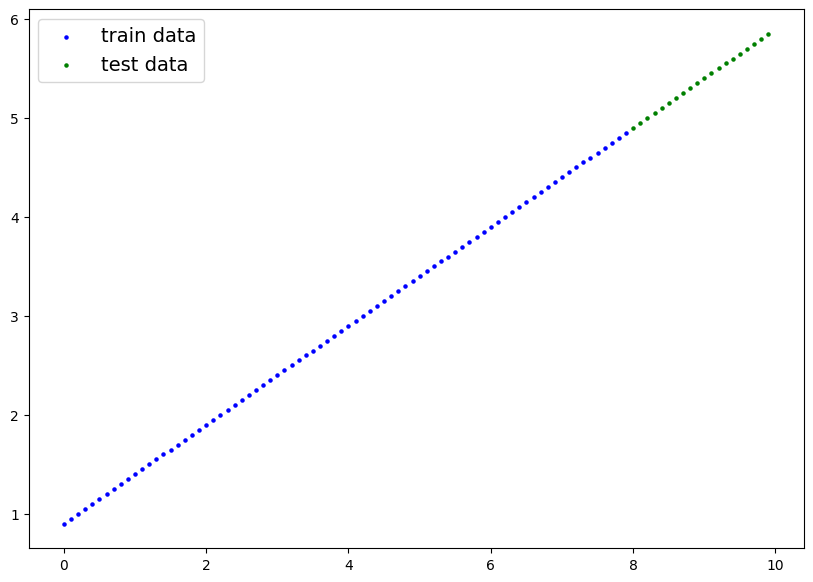

In [16]:
visiual()

In [22]:
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1))
    self.bias= nn.Parameter(torch.randn(1))
  def forward (self, x: torch.Tensor) -> torch.Tensor:
    return self.weight * x + self.bias

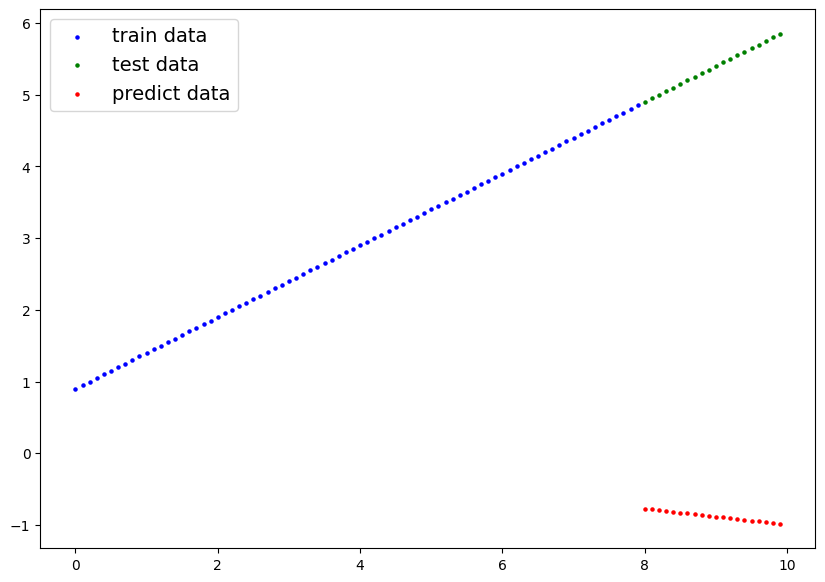

In [23]:
torch.manual_seed(123)
model = LinearRegression()
with torch.inference_mode():
  y_pred = model(x_test)
visiual(predict=y_pred)

In [25]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model.parameters(), lr= 0.001)

In [26]:
epoches = 1000
for epoch in range(epoches):
  model.train()
  y_pred = model(x_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model.eval()
  with torch.inference_mode():
    y_pred = model(x_test)
    loss = loss_fn(y_pred, y_test)
  if epoch % 100 == 0:
    print(f"loss: {loss}")

loss: 6.215915679931641
loss: 2.580665349960327
loss: 0.3356791138648987
loss: 0.32836461067199707
loss: 0.3044126629829407
loss: 0.28046056628227234
loss: 0.25650838017463684
loss: 0.23255614936351776
loss: 0.20732557773590088
loss: 0.18337294459342957


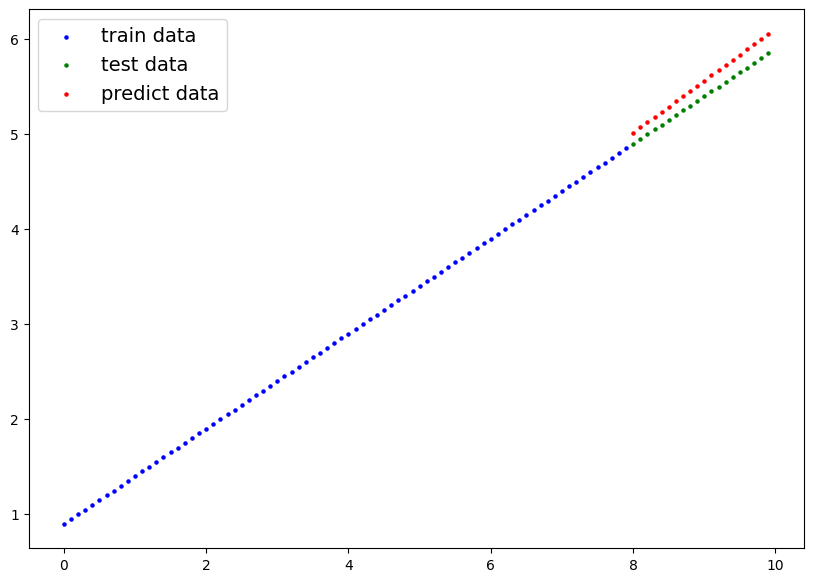

In [27]:
visiual(predict=y_pred)

In [29]:
from pathlib import Path

In [35]:
path_name = Path("Model")
path_name.mkdir(parents=True, exist_ok=True)
model_name = "SimpleTrainingModelPytorch.pth"
save_path = path_name / model_name
torch.save(obj=model.state_dict(), f=save_path)

In [36]:
loaded_model = LinearRegression()
loaded_model.load_state_dict(torch.load(f=save_path))
loaded_model(x_test) == y_pred

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True])